# 교재 파이썬 코드
https://github.com/sunkyoo/opencv4cvml/tree/master/python

# Image란?

## Image는 width X height X channel 의 pixels로 이루어진 matrix(배열)

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.

- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.

- 일반적인 Image는 unsigned integer 8bit로 표현
    - 0 ~ 255 로 표현: 0이 black
- bit수가 높아질 수록 표현할 수 있는 색의 범위가 증가한다.   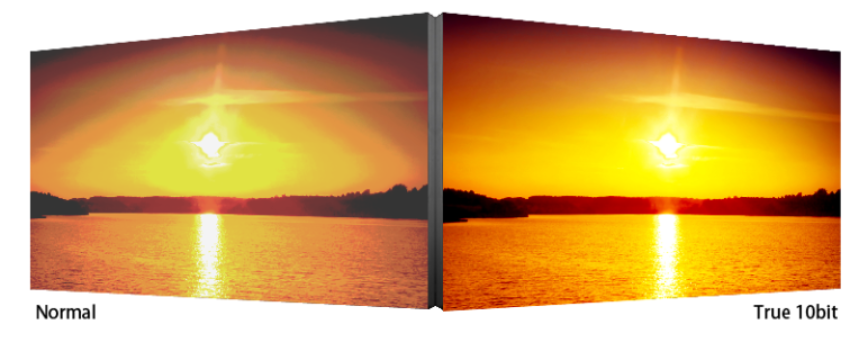

# Open CV 개요
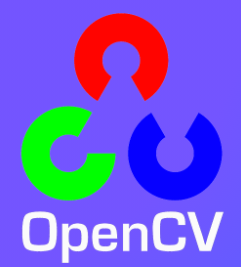

- https://opencv.org/
- 튜토리얼: https://docs.opencv.org/master/
- Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨
- Intel에서 개발하다가 open source화 됨
- Cross Platform이기 때문에 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
- 실시간에 초점을 맞추고 나온 library이기 때문에 mobile camera나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.
- 속도가 빠르다.
- 함수 지향

# OpenCV 설치

- `!pip install opencv-contrib-python`

In [1]:
import cv2
import numpy as np

# 이미지 읽기
- **`imread(filename [, flag]) : ndarray`**
    - 이미지를 읽는다.
        
    - filename: 읽어들일 이미지 파일경로
    - flag: 읽기 모드
        - cv2.IMREAD_XXXXX 상수를 이용한다.
        - IMREAD_COLOR가 기본(BGR 모드)
            - matplotlib에서 출력시 rgb 모드로 변환해야 한다.

In [2]:
lenna = cv2.imread("images/Lenna.png")   # 이미지를 ndarray로 읽어들인다

In [3]:
print(type(lenna))
print(lenna.shape)   # (height, width, channel)

<class 'numpy.ndarray'>
(512, 512, 3)


In [4]:
cv2.imshow("Lenna", lenna)
cv2.waitKey(0)   # 키보드의 키를 누를 때까지 기다리면서 이미지를 띄운다. 괄호 안은 입력을 기다리는 밀리초. 0을 주면 계속 대기
cv2.destroyAllWindows()   # 이미지를 띄운 모든 윈도우들을 종료시킨다.

### matplotlib 으로 출력
- jupyter notebook 내에 출력이 가능
- plt.imshow(ndarray)

In [5]:
# %matplotlib qt5
# %matplotlib inline

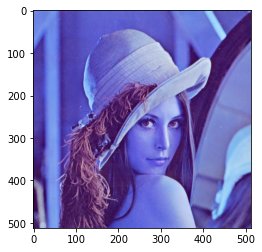

In [6]:
import matplotlib.pyplot as plt
# BGR 모드로 읽어들임(Blue, Green, Red)
plt.imshow(lenna)
plt.show()

## 색공간 변환
- **`cv2.cvtColor(src, code)`**
    - image 의 color space를 변환한다. 
    - src: 변환시킬 이미지 (ndarray)
    - code
        - 변환시킬 색공간 타입 지정
        - cv2.COLOR_XXX**2**YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            - cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR  (BGR <-> RGB)
            - cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR  (BGR <-> HSV)

> ### HSV
> - Hue: 색상, 색의 종류
> - Saturation: 채도. 색의 선명도
> - Value : 명도. 밝기

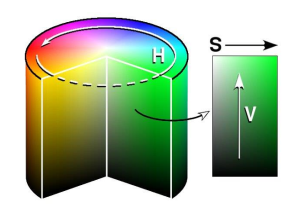
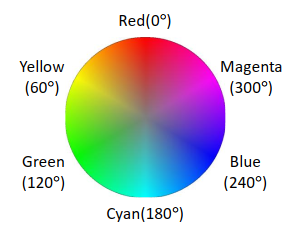

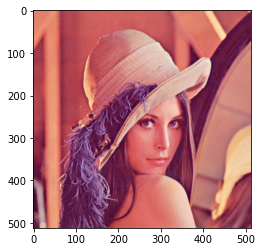

In [7]:
plt.imshow(lenna[:, :, ::-1])   # 블루와 레드의 위치를 바꾸기
plt.show()

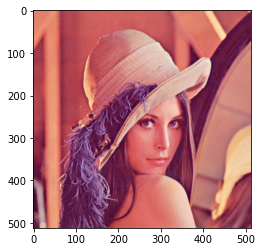

In [8]:
lenna_rgb = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
plt.imshow(lenna_rgb)
plt.show()

In [10]:
cv2.imshow("frame", lenna_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

<function destroyAllWindows>

In [8]:
lenna_gray = cv2.cvtColor(lenna, cv2.COLOR_BGR2GRAY)
cv2.imshow("gray", lenna_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(lenna_gray.shape)

(512, 512)


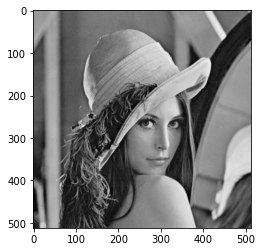

In [9]:
plt.imshow(lenna_gray, cmap='gray')
plt.show()

In [10]:
lenna_gray

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [11]:
lenna

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

## 채널 확인
- 채널별로 나눠 이미지 출력

In [13]:
# lenna BGR
blue, green, red = cv2.split(lenna)
blue.shape, green.shape, red.shape
# blue = lenna[:, :, 0]
# green = lenna[:, :, 1]
# red = lenna[:, :, 2]

((512, 512), (512, 512), (512, 512))

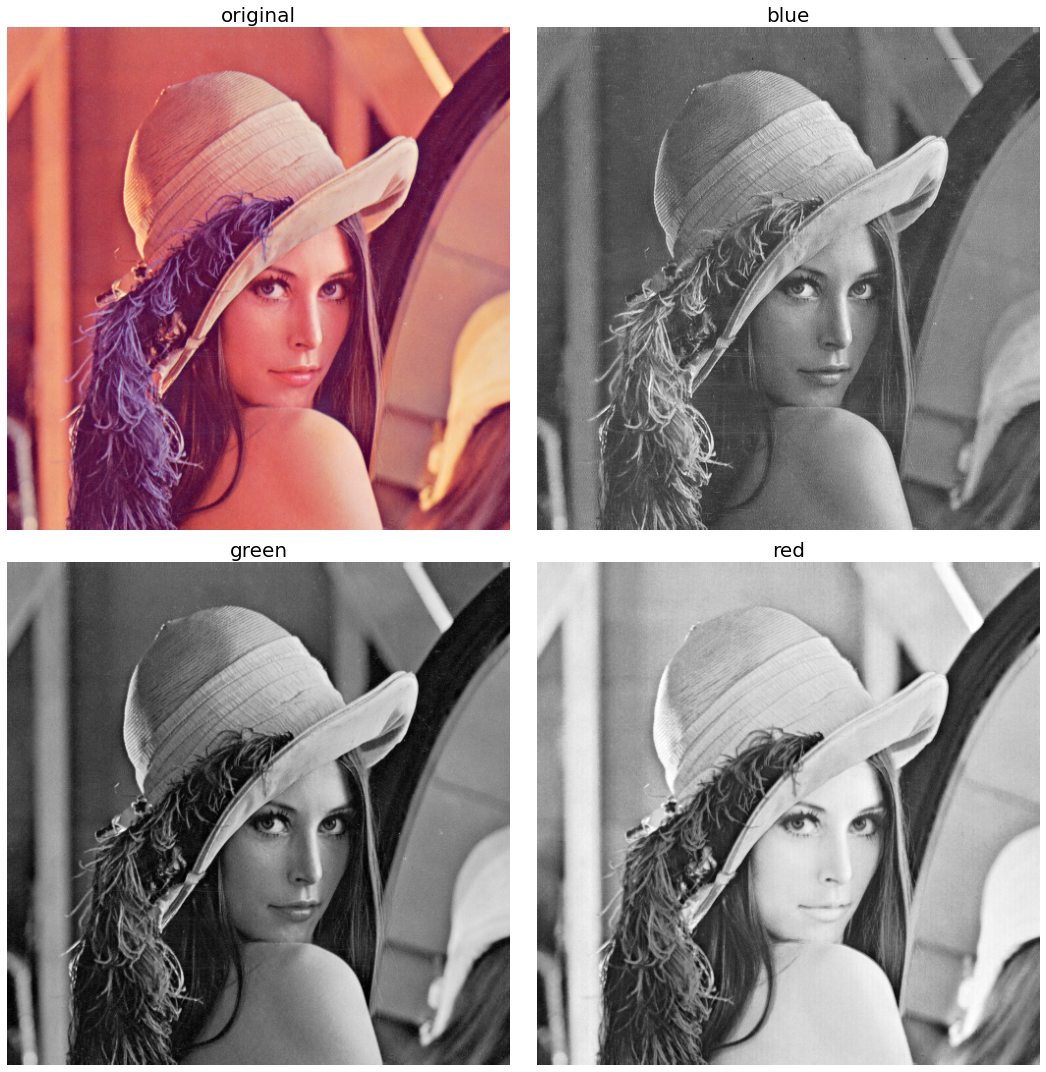

In [17]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.title("original", fontsize = 20)
plt.imshow(lenna[:,:,::-1])   # BGR -> RGB

plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("blue", fontsize = 20)
plt.imshow(blue, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("green", fontsize = 20)
plt.imshow(green, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("red", fontsize = 20)
plt.imshow(red, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



## cv2에서 이미지 출력
- **`cv2.imshow(winname, mat)`**
    - 창을 띄워 이미지를 출력한다.
    - winname: 창 이름
        - 창이름이 같으면 같은 창에 띄운다.
    - mat: 출력할 이미지(ndarray)
        - dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
- **`cv2.imwrite(filename, img): bool`**
    - 이미지 파일로 저장
    - filename: 저장할 파일경로
    - img: 저장할 이미지(ndarray)

In [18]:
lenna.dtype

dtype('uint8')

In [19]:
# 윈도우를 열어서 lenna 변수의 ndarray를 이미지로 보여주는 함수
cv2.imshow("Image", lenna)
cv2.waitKey(0)   # 다음 줄 코드로 넘어가지 않도록 key 입력을 대기시킨다. 반환값은 입력된 키 값.
cv2.imshow("Frame", lenna_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# 특정 키를 누르면 종료되도록 처리
cv2.imshow('img', lenna)

while True:
    if cv2.waitKey(0) == 27:   # 27 = esc -> esc를 눌렀을 때만 종료
        break

cv2.destroyAllWindows()

In [26]:
ord('q')   # 입력받은 문자를 정수로 변환

113

# 동영상 처리

## 동영상 읽기
- VideoCapture 클래스사용
    - 객체 생성
        - VideoCapture('동영상파일 경로'): 동영상파일
        - VideoCapture(웹캠 ID): 웹캠
- VideoCapture의 주요 메소드
    - isOpened(): bool
        - 입력 대상과 연결되었는지 여부반환
    - read(): (bool, img)
        - Frame 이미지로 읽기
        - 반환값
            - bool: 읽었는지 여부
            - img: 읽은 이미지(ndarray)

### 웹캠

### 동영상 저장
- capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
- VideoWriter 객체를 이용해 저장
    - **`VideoWriter(filename, codec, fps, size)`**
        - filename: 저장경로
        - codec
            - VideoWriter_fourcc 이용
            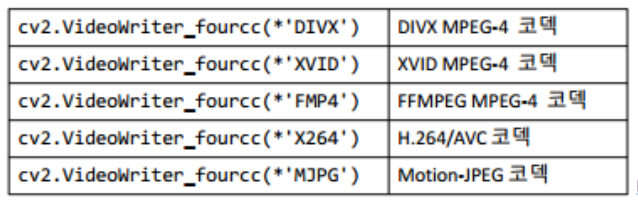
        - fps
            - FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        - size
            - 저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    - `VideoWriter().write(img)`
        - Frame 저장